# ИЗ 2

### 1. Определение и сравнение итеративной и рекурсивной процедур подсчета вершин с двумя потомками

Этот скрипт содержит определения класса `TreeNode` для представления узлов бинарного дерева, а также две функции для подсчета количества вершин с двумя потомками: одна итеративная и одна рекурсивная.

In [1]:
class TreeNode:
    def __init__(self, value=0, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right


def count_double_child_nodes_iterative(root):
    if not root:
        return 0
    count = 0
    queue = [root]
    while queue:
        node = queue.pop(0)
        if node.left and node.right:
            count += 1
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)
    return count


def count_double_child_nodes_recursive(root):
    if not root:
        return 0
    left = count_double_child_nodes_recursive(root.left)
    right = count_double_child_nodes_recursive(root.right)
    if root.left and root.right:
        return 1 + left + right
    else:
        return left + right


### 2. Генерация бинарных деревьев и измерение времени выполнения процедур

В этом скрипте представлены функции для генерации бинарного дерева заданной глубины, измерения времени выполнения рекурсивной и итеративной процедур подсчета вершин с двумя потомками, а также построения графика и таблицы для сравнения времени выполнения.

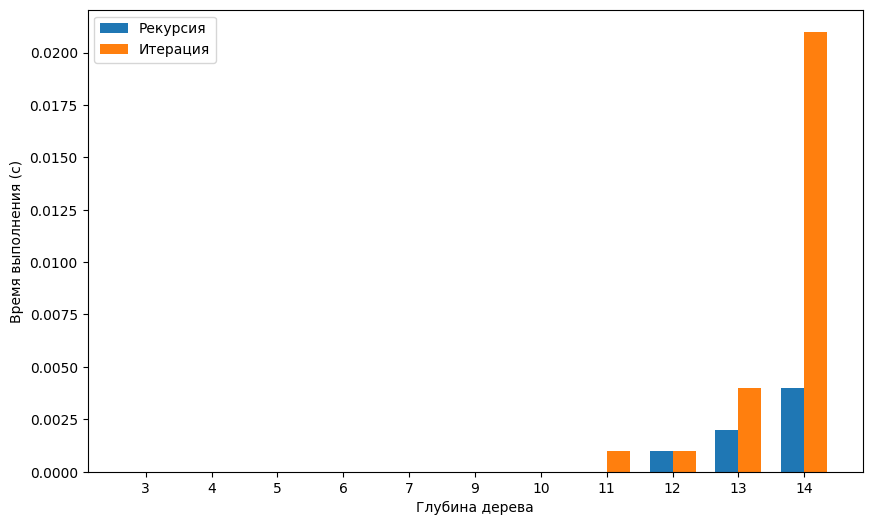

In [16]:

import time
import matplotlib.pyplot as plt
import numpy as np


def generate_tree(depth, value=1):
    if depth == 0:
        return None
    return TreeNode(value, generate_tree(depth - 1, value * 2), generate_tree(depth - 1, value * 2 + 1))


def measure_time(func, root):
    start = time.time()
    func(root)
    end = time.time()
    return end - start


# Пример использования для генерации деревьев, измерения времени и построения графика
depths = [3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14]
recursive_times = []
iterative_times = []

for depth in depths:
    root = generate_tree(depth)
    recursive_time = measure_time(count_double_child_nodes_recursive, root)
    iterative_time = measure_time(count_double_child_nodes_iterative, root)
    recursive_times.append(recursive_time)
    iterative_times.append(iterative_time)

plt.figure(figsize=(10, 6))
index = np.arange(len(depths))
bar_width = 0.35
plt.bar(index, recursive_times, bar_width, label='Рекурсия')
plt.bar(index + bar_width, iterative_times, bar_width, label='Итерация')
plt.xlabel('Глубина дерева')
plt.ylabel('Время выполнения (с)')
plt.xticks(index + bar_width / 2, depths)
plt.legend()
plt.show()


# ИЗ 1


### Создание графа

Используя библиотеку NetworkX, создается пример неориентированного графа `G` с ребрами, соединяющими вершины в указанной последовательности:

In [3]:

import networkx as nx
import itertools

G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (1, 3), (2, 4)])



### Функция проверки вершинного покрытия

`is_vertex_cover(G, vertex_cover)` проверяет, является ли предложенное множество вершин `vertex_cover` вершинным покрытием для графа `G`:

In [4]:
def is_vertex_cover(G, vertex_cover):
    covered_edges = set()
    for vertex in vertex_cover:
        for neighbor in G.neighbors(vertex):
            covered_edges.add(frozenset([vertex, neighbor]))
    return len(covered_edges) == G.number_of_edges()



### Точный алгоритм

`exact_vertex_cover(G)` ищет минимальное вершинное покрытие графа `G`, перебирая все возможные комбинации вершин:


In [5]:

def exact_vertex_cover(G):
    n = G.number_of_nodes()
    for k in range(1, n + 1):
        for vertices in itertools.combinations(G.nodes(), k):
            if is_vertex_cover(G, vertices):
                return set(vertices)
    return None


### Жадный алгоритм

`greedy_vertex_cover(G)` реализует жадный подход к нахождению вершинного покрытия, последовательно выбирая рёбра и включая их вершины в покрытие:

In [6]:

def greedy_vertex_cover(G):
    cover = set()
    edges = set(G.edges())
    while edges:
        u, v = edges.pop()
        cover.update([u, v])
        edges.difference_update(set(G.edges([u, v])))
    return cover


### Алгоритм с использованием максимальных степеней вершин

`max_degree_vertex_cover(G)` выбирает вершины с максимальной степенью для включения в покрытие:

In [7]:

def max_degree_vertex_cover(G):
    cover = set()
    temp_graph = G.copy()
    while temp_graph.number_of_edges() > 0:
        max_degree_node = max(temp_graph.degree, key=lambda x: x[1])[0]
        cover.add(max_degree_node)
        temp_graph.remove_node(max_degree_node)
    return cover


### Алгоритм с удалением рёбер

`edge_removal_vertex_cover(G)` удаляет рёбра, инцидентные выбранным вершинам, до тех пор, пока все рёбра не будут покрыты:

In [8]:

def edge_removal_vertex_cover(G):
    cover = set()
    temp_graph = G.copy()
    while temp_graph.number_of_edges() > 0:
        edge = next(iter(temp_graph.edges))
        u, v = edge
        cover.update([u, v])
        temp_graph.remove_nodes_from([u, v])
    return cover


### Вывод результатов

В конце программы выводятся результаты выполнения всех алгоритмов:

In [9]:
print('Граф:', G.edges())
print('Точный алгоритм:', exact_vertex_cover(G))
print('Жадный алгоритм:', greedy_vertex_cover(G))
print('Алгоритм с использованием максимальных степеней вершин:', max_degree_vertex_cover(G))
print('Алгоритм с удалением рёбер:', edge_removal_vertex_cover(G))


Граф: [(1, 2), (1, 4), (1, 3), (2, 3), (2, 4), (3, 4)]
Точный алгоритм: {1, 2, 3}
Жадный алгоритм: {1, 2, 3, 4}
Алгоритм с использованием максимальных степеней вершин: {1, 2, 3}
Алгоритм с удалением рёбер: {1, 2, 3, 4}



**Результаты**:
- Точный алгоритм и алгоритм с использованием максимальных степеней вершин нашли минимальное вершинное покрытие, состоящее из вершин {1, 2, 3}.
- Жадный алгоритм и алгоритм с удалением рёбер предложили вершинное покрытие {1, 2, 3, 4}, которое не является минимальным.